# Setup and Data Loading

In [ ]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
# Set plot styles
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Display settings for better output
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('customer_behavior_analytcis.csv')

In [ ]:
df.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [ ]:
df.isnull().sum()

,0
total_purchases,20
avg_cart_value,20
total_time_spent,0
product_click,20
discount_counts,0
customer_id,0


In [ ]:
df.describe()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,979.000000,979.000000,999.000000,979.000000,999.000000
mean,11.570991,75.457978,49.348759,28.237998,4.313313
std,7.016327,55.067835,32.730973,16.296384,4.532772
min,0.000000,10.260000,5.120000,4.000000,0.000000
25%,6.000000,33.130000,22.375000,16.000000,1.000000
50%,10.000000,49.380000,40.360000,21.000000,2.000000
75%,17.000000,121.255000,77.170000,45.000000,8.000000
max,32.000000,199.770000,119.820000,73.000000,21.000000


In [ ]:
# Identify features
features = [col for col in df.columns if col != 'customer_id']
print(features)

['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']


# Exploratory Data Analysis (EDA)

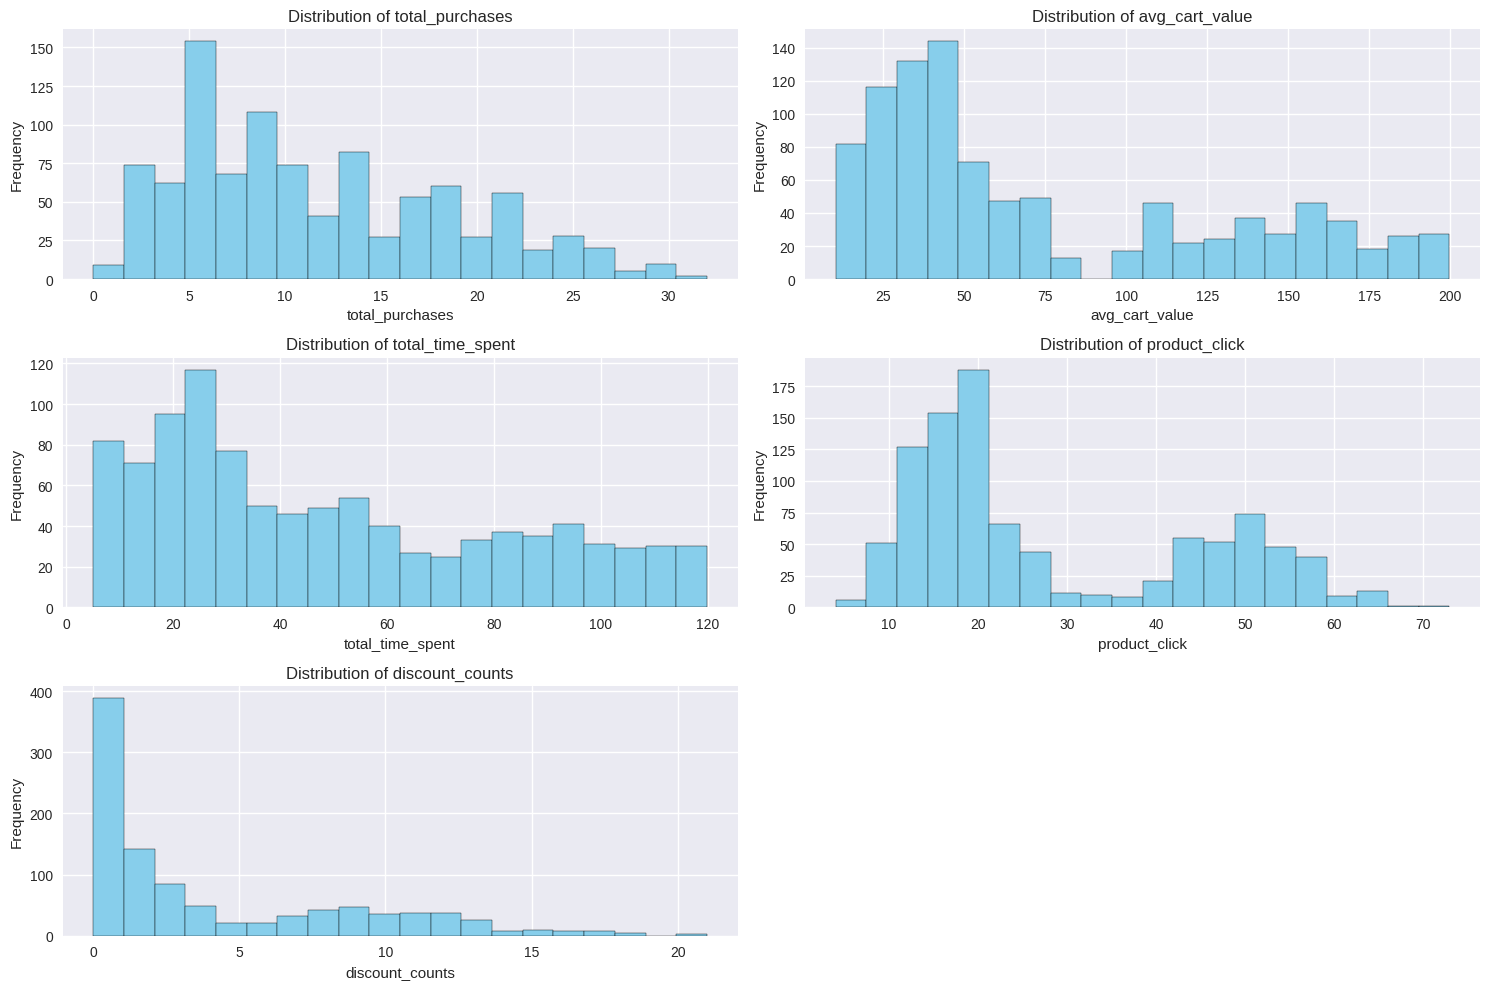

In [ ]:
# Distribution of features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

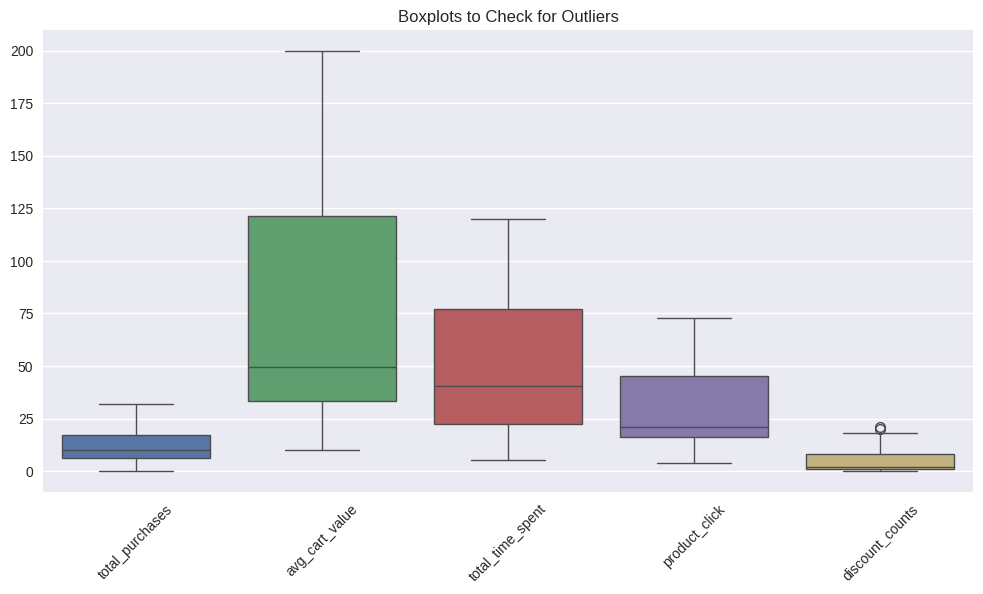

In [ ]:
# Check for outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[features])
plt.title('Boxplots to Check for Outliers')
plt.xticks(rotation=45)
plt.show()

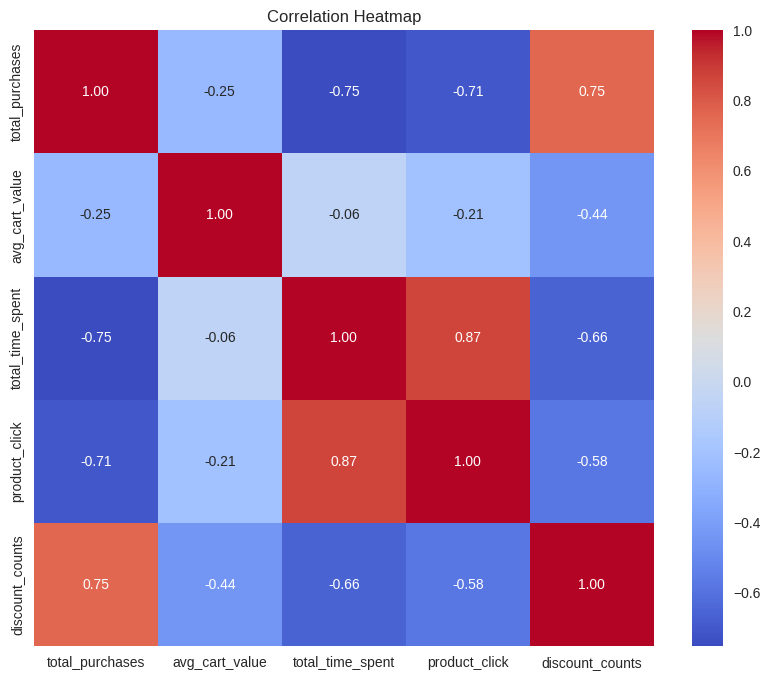

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

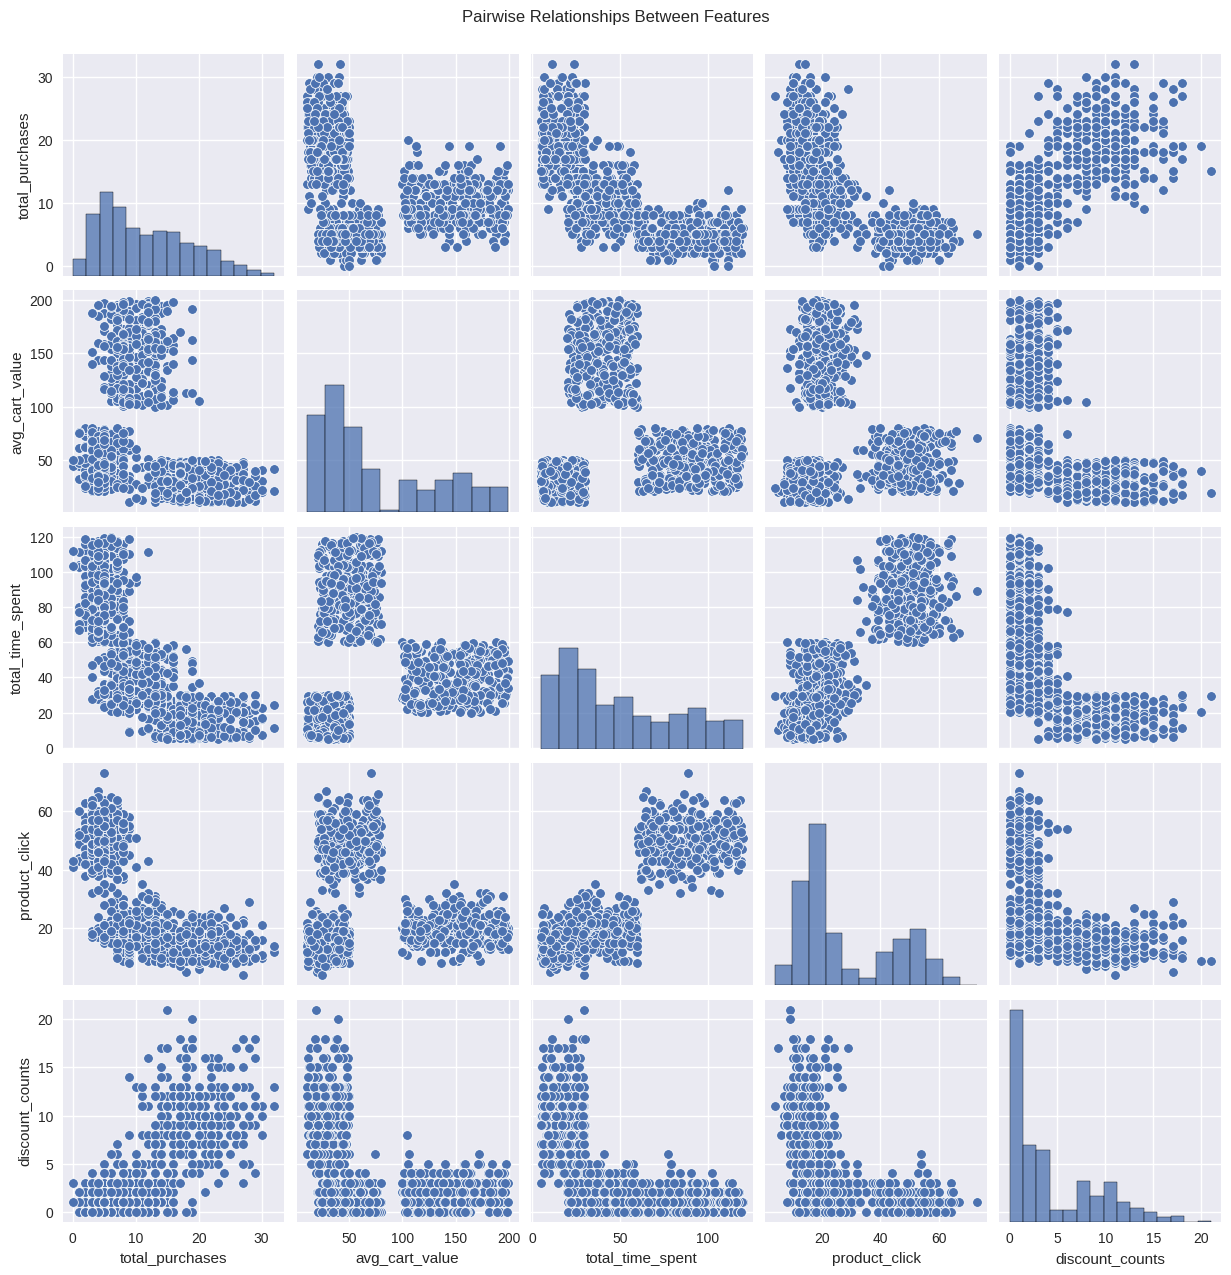

In [ ]:
# Pairplot for feature relationships
sns.pairplot(df[features])
plt.suptitle('Pairwise Relationships Between Features', y=1.02)
plt.show()

# Data Preprocessing

In [ ]:
missing_values = df[features].isnull().sum()
total_missing = missing_values.sum()
print(total_missing)

60


In [ ]:
if total_missing > 0:
    from sklearn.impute import SimpleImputer

    features_df = df[features].copy()

    imputer = SimpleImputer(strategy='mean')

    features_imputed = imputer.fit_transform(features_df)

    features_df = pd.DataFrame(features_imputed, columns=features)

    print("Missing values have been replaced with mean values.")
else:
    features_df = df[features].copy()
    print("No missing values found in the dataset.")

Missing values have been replaced with mean values.


In [ ]:
print(features_df.isnull().sum())

total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
dtype: int64


In [ ]:
def detect_outliers(df, features):
    outlier_indices = []

    for column in features:

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        column_outliers = df[(df[column] < Q1 - outlier_step) |
                             (df[column] > Q3 + outlier_step)].index

        outlier_indices.extend(column_outliers)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(outlier_indices.keys())

    return multiple_outliers

In [ ]:
# Detect outliers
outlier_indices = detect_outliers(features_df, features)
print(f"Number of outliers detected: {len(outlier_indices)}")
print(f"Percentage of data that are outliers: {len(outlier_indices)/len(features_df)*100:.2f}%")

Number of outliers detected: 2
Percentage of data that are outliers: 0.20%


In [ ]:
# Handle outliers
if len(outlier_indices) / len(features_df) < 0.05:
    print("Removing outliers from the dataset...")
    features_df_clean = features_df.drop(outlier_indices)
    print(f"Data shape after removing outliers: {features_df_clean.shape}")
else:

    print("Capping outliers to the 5th and 95th percentiles...")
    features_df_clean = features_df.copy()

    for column in features:

        lower_bound = features_df[column].quantile(0.05)
        upper_bound = features_df[column].quantile(0.95)

        features_df_clean[column] = features_df_clean[column].clip(lower=lower_bound, upper=upper_bound)

    print("Outliers have been capped.")

Removing outliers from the dataset...
Data shape after removing outliers: (997, 5)


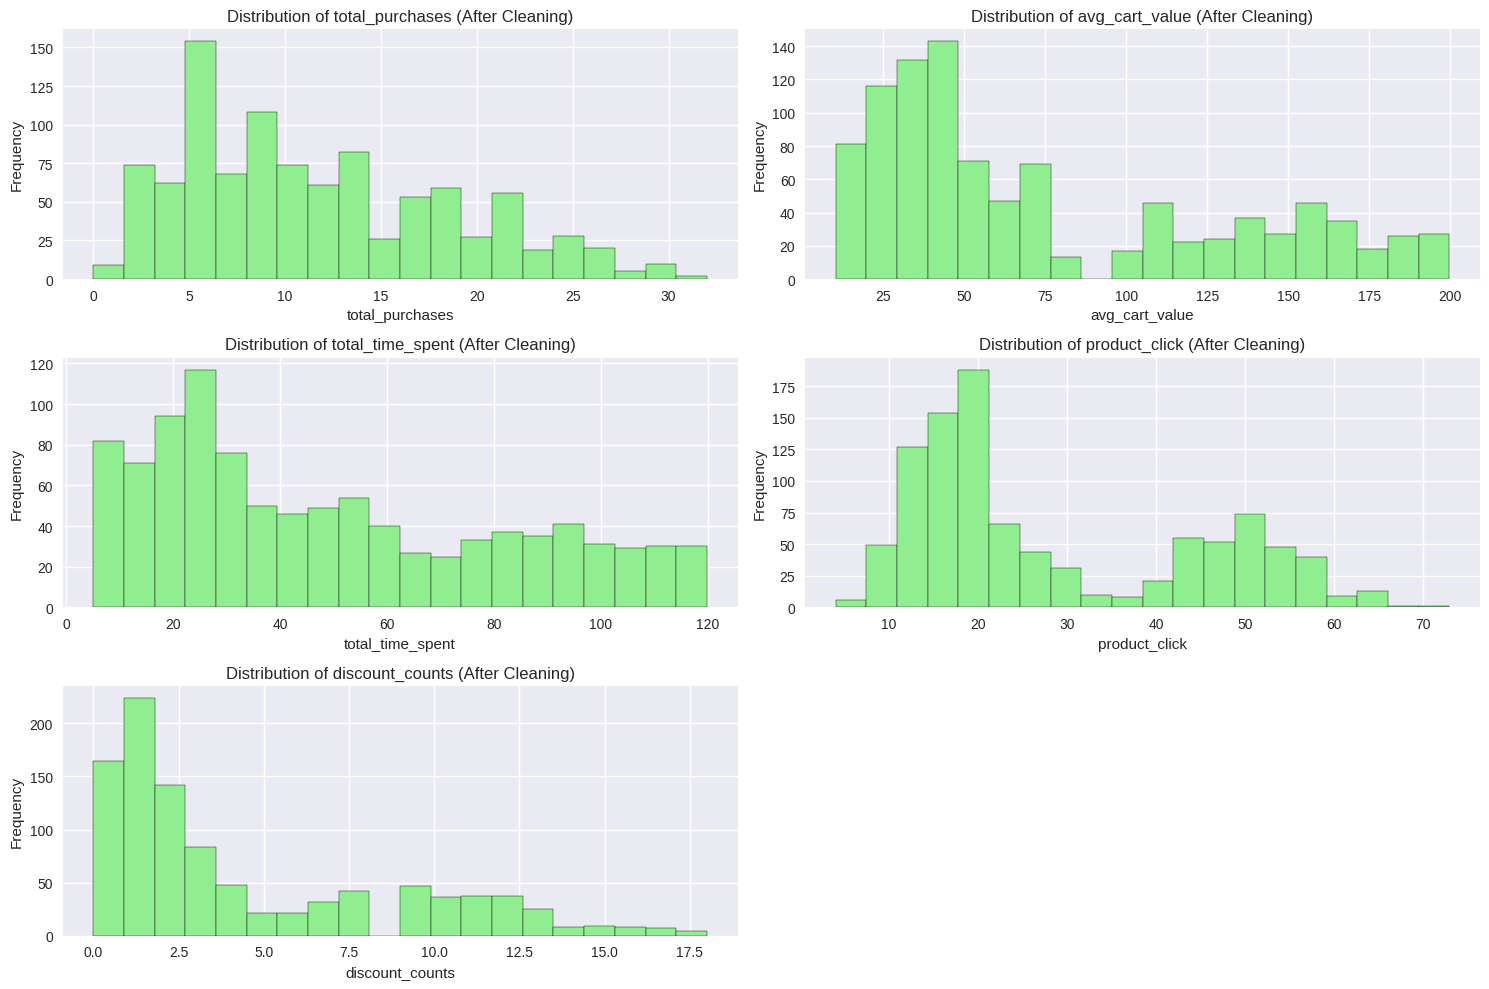

In [ ]:
# Visualize cleaned data distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    plt.hist(features_df_clean[feature], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {feature} (After Cleaning)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_clean = features_df_clean.values

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Dimensionality Reduction for Visualization

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

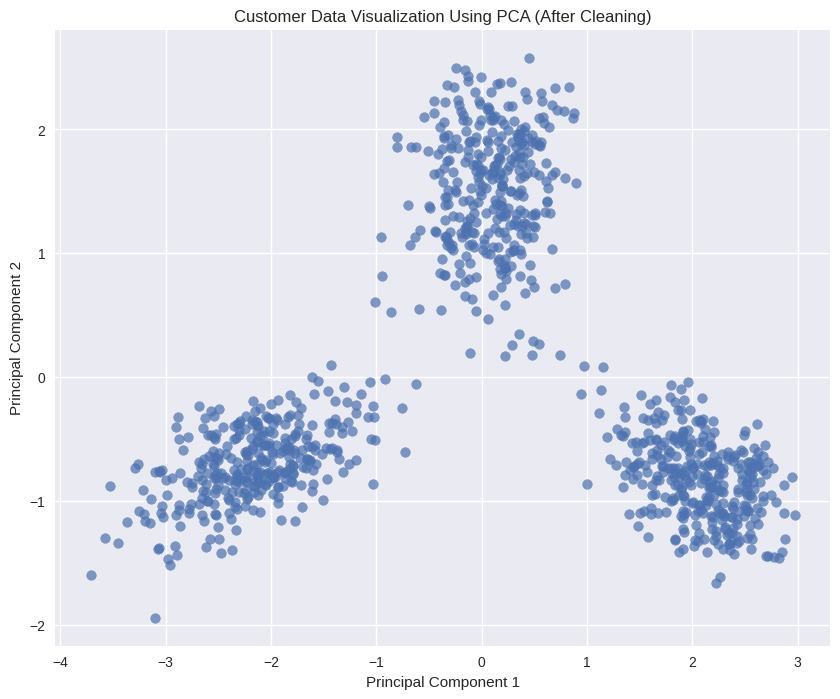

In [ ]:
# Visualize in 2D
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('Customer Data Visualization Using PCA (After Cleaning)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_)*100:.2f}%")

Explained variance ratio: [0.63453962 0.26046665]
Total explained variance: 89.50%


# Determining the Optimal Number of Clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Elbow Method
inertia = []
k_range = range(1, 10)

In [ ]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

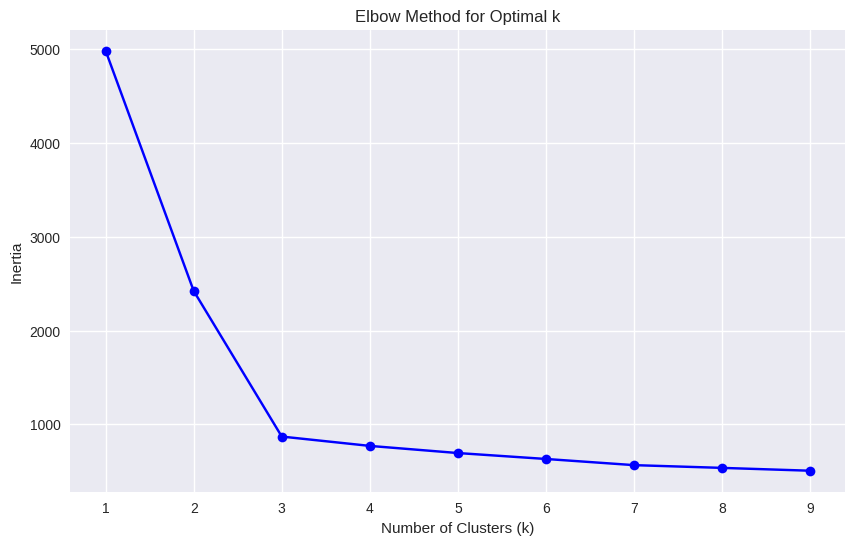

In [ ]:
# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
# Silhouette Score Method
silhouette_scores = []
k_range_sil = range(2, 10)

In [ ]:
for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

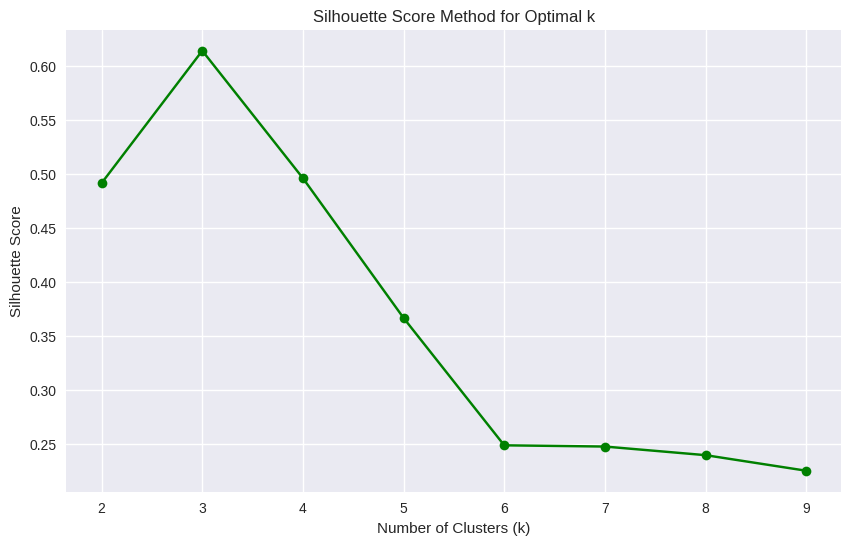

In [ ]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range_sil, silhouette_scores, 'o-', color='green')
plt.title('Silhouette Score Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
# Print optimal k values
print(f"Optimal k according to Silhouette Score: {k_range_sil[np.argmax(silhouette_scores)]}")
print(f"From the problem statement, we expect k=3 clusters")

Optimal k according to Silhouette Score: 3
From the problem statement, we expect k=3 clusters


In [ ]:
optimal_k = 3

# Applying K-means Clustering

In [ ]:
# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

In [ ]:
# Calculate silhouette score for the chosen k
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg:.3f}")

Silhouette Score for 3 clusters: 0.614


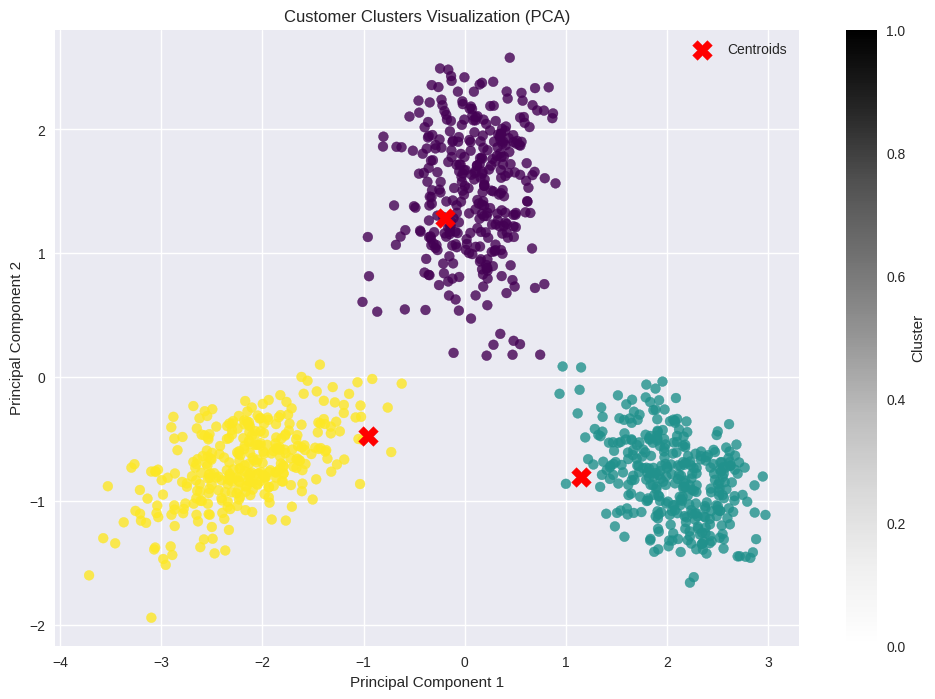

In [ ]:
# Visualize the clusters using PCA
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title('Customer Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()

# Analyzing Cluster Characteristics

In [ ]:
df_clean = pd.DataFrame(X_scaled, columns=features)
df_clean['cluster'] = cluster_labels

In [ ]:
# Calculate cluster statistics
cluster_stats = df_clean.groupby('cluster')[features].mean()
print("Cluster Centers (mean values):")
print(cluster_stats)

Cluster Centers (mean values):
         total_purchases  avg_cart_value  total_time_spent  product_click  \
cluster                                                                     
0              -0.193988        1.281484         -0.272717      -0.506065   
1              -0.952791       -0.480790          1.247052       1.314184   
2               1.151415       -0.810856         -0.975631      -0.807503   

         discount_counts  
cluster                   
0              -0.522886  
1              -0.726840  
2               1.256661  


In [ ]:
# Count customers in each cluster
cluster_counts = df_clean['cluster'].value_counts()
print("\nNumber of customers in each cluster:")
print(cluster_counts)


Number of customers in each cluster:
cluster
0    334
1    332
2    331
Name: count, dtype: int64


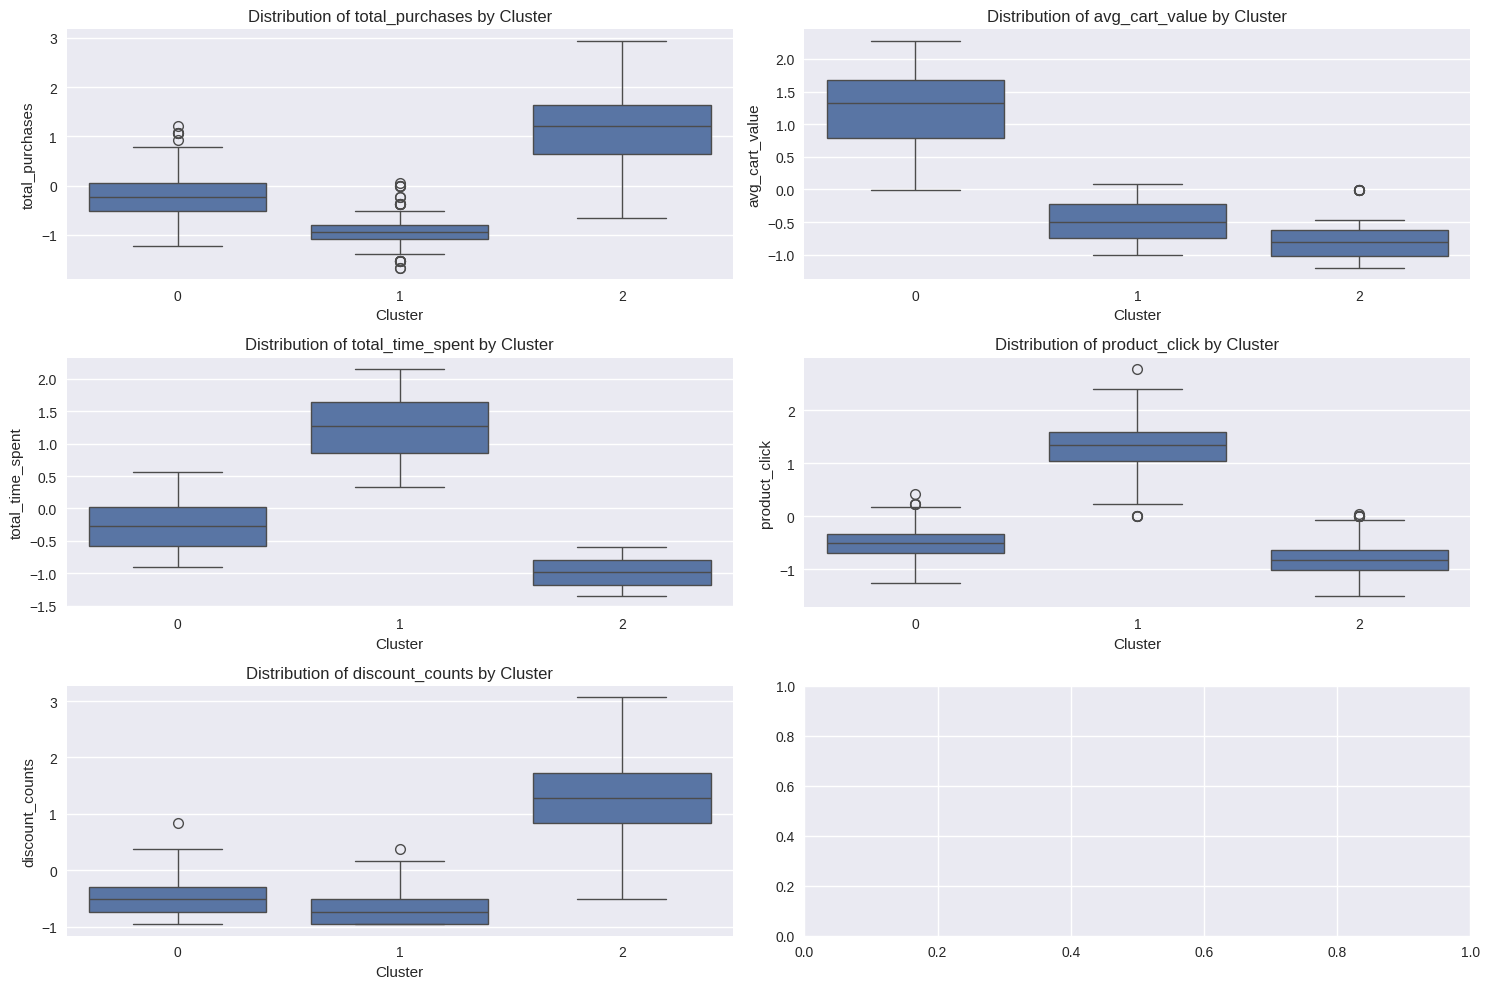

In [ ]:
# Compare feature distributions across clusters
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    if i < len(axes):
        sns.boxplot(x='cluster', y=feature, data=df_clean, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature} by Cluster')
        axes[i].set_xlabel('Cluster')
        axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
# Create a radar chart for cluster comparison
def radar_chart(stats, features):
    N = len(features)

    # Calculate angles for radar chart
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    # Normalize the data for the radar chart
    from sklearn.preprocessing import MinMaxScaler
    radar_scaler = MinMaxScaler()
    stats_scaled = pd.DataFrame(
        radar_scaler.fit_transform(stats),
        index=stats.index,
        columns=stats.columns
    )

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Add cluster profiles
    for cluster_id, row in stats_scaled.iterrows():
        values = row.tolist()
        values += values[:1]  # close the loop
        ax.plot(angles, values, linewidth=2, label=f'Cluster {cluster_id}')
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)

    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.title('Cluster Profiles', size=20)
    plt.show()

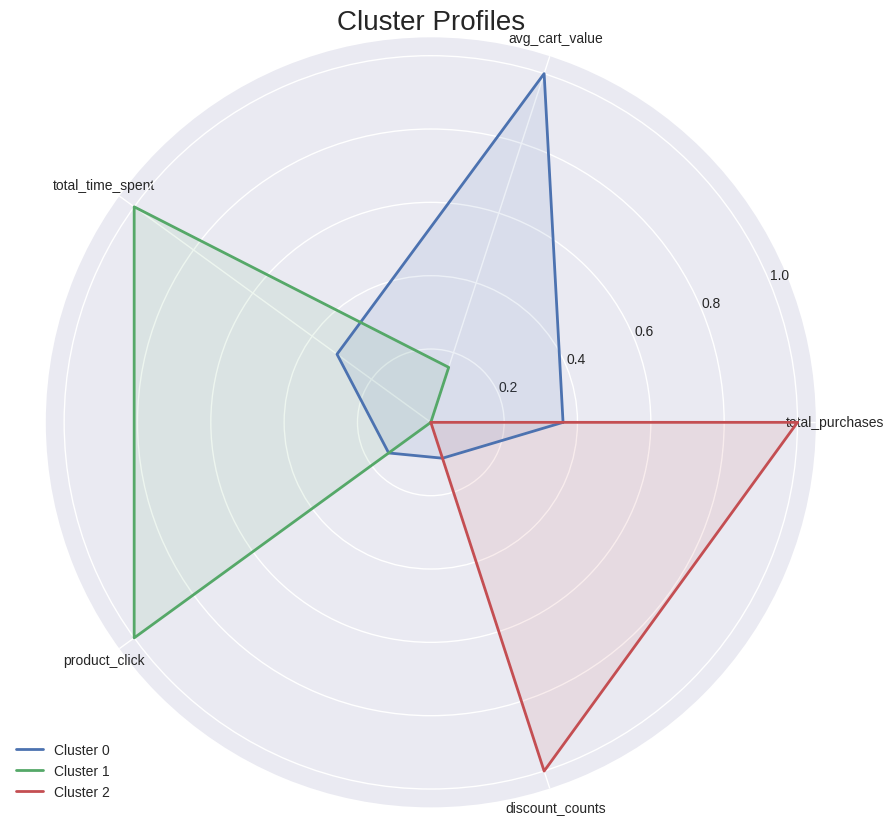

In [ ]:
radar_chart(cluster_stats, features)

# Mapping Clusters to Customer Segments

In [ ]:
# Calculate z-scores for each cluster
overall_mean = df_clean[features].mean()
overall_std = df_clean[features].std()

In [ ]:

cluster_z_scores = {}
for cluster_id in range(optimal_k):
    cluster_mean = df_clean[df_clean['cluster'] == cluster_id][features].mean()
    z_scores = (cluster_mean - overall_mean) / overall_std
    cluster_z_scores[cluster_id] = z_scores

    print(f"\nCluster {cluster_id} Z-Scores:")
    print(z_scores)


Cluster 0 Z-Scores:
total_purchases    -0.193890
avg_cart_value      1.280841
total_time_spent   -0.272581
product_click      -0.505812
discount_counts    -0.522623
dtype: float64

Cluster 1 Z-Scores:
total_purchases    -0.952313
avg_cart_value     -0.480548
total_time_spent    1.246427
product_click       1.313525
discount_counts    -0.726475
dtype: float64

Cluster 2 Z-Scores:
total_purchases     1.150838
avg_cart_value     -0.810449
total_time_spent   -0.975141
product_click      -0.807098
discount_counts     1.256030
dtype: float64


In [ ]:
segment_templates = {
    'Bargain Hunters': {
        'total_purchases': 'high',
        'avg_cart_value': 'low',
        'total_time_spent': 'moderate',
        'product_click': 'moderate',
        'discount_counts': 'high'
    },
    'High Spenders': {
        'total_purchases': 'moderate',
        'avg_cart_value': 'high',
        'total_time_spent': 'moderate',
        'product_click': 'moderate',
        'discount_counts': 'low'
    },
    'Window Shoppers': {
        'total_purchases': 'low',
        'avg_cart_value': 'moderate',
        'total_time_spent': 'high',
        'product_click': 'high',
        'discount_counts': 'low'
    }
}

In [ ]:
# Function to categorize z-scores
def categorize_z_score(z_score):
    if z_score > 0.5:
        return 'high'
    elif z_score < -0.5:
        return 'low'
    else:
        return 'moderate'

In [ ]:
# Categorize each cluster's features
cluster_categories = {}
for cluster_id, z_scores in cluster_z_scores.items():
    categories = {}
    for feature, z_score in z_scores.items():
        categories[feature] = categorize_z_score(z_score)
    cluster_categories[cluster_id] = categories

    print(f"\nCluster {cluster_id} Categories:")
    print(categories)


Cluster 0 Categories:
{'total_purchases': 'moderate', 'avg_cart_value': 'high', 'total_time_spent': 'moderate', 'product_click': 'low', 'discount_counts': 'low'}

Cluster 1 Categories:
{'total_purchases': 'low', 'avg_cart_value': 'moderate', 'total_time_spent': 'high', 'product_click': 'high', 'discount_counts': 'low'}

Cluster 2 Categories:
{'total_purchases': 'high', 'avg_cart_value': 'low', 'total_time_spent': 'low', 'product_click': 'low', 'discount_counts': 'high'}


In [ ]:
# Calculate similarity scores between clusters and segment templates
similarity_scores = {}
for cluster_id, categories in cluster_categories.items():
    scores = {}
    for segment, template in segment_templates.items():
        matches = sum(1 for feature in categories if categories[feature] == template[feature])
        scores[segment] = matches
    similarity_scores[cluster_id] = scores

print("\nSimilarity Scores (number of matching characteristics):")
for cluster_id, scores in similarity_scores.items():
    print(f"Cluster {cluster_id}: {scores}")


Similarity Scores (number of matching characteristics):
Cluster 0: {'Bargain Hunters': 1, 'High Spenders': 4, 'Window Shoppers': 1}
Cluster 1: {'Bargain Hunters': 0, 'High Spenders': 1, 'Window Shoppers': 5}
Cluster 2: {'Bargain Hunters': 3, 'High Spenders': 0, 'Window Shoppers': 0}


In [ ]:
# Assign segments based on highest similarity
cluster_mapping = {}
for cluster_id, scores in similarity_scores.items():
    best_segment = max(scores, key=scores.get)
    cluster_mapping[cluster_id] = best_segment


In [ ]:
for cluster_id, segment in cluster_mapping.items():
    print(f"Cluster {cluster_id} -> {segment}")

Cluster 0 -> High Spenders
Cluster 1 -> Window Shoppers
Cluster 2 -> Bargain Hunters


In [ ]:
df_clean['segment'] = df_clean['cluster'].map(cluster_mapping)

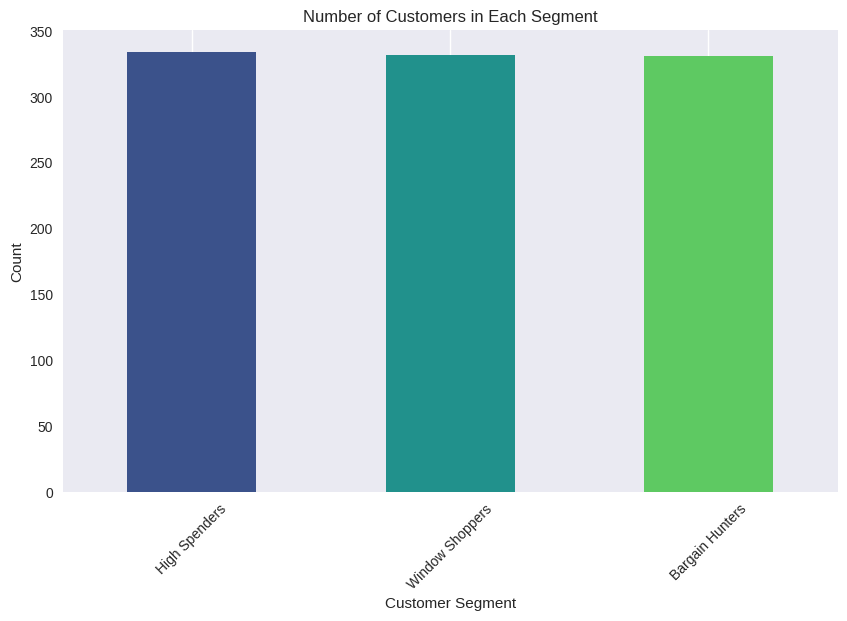

In [ ]:
# Visualize the segment distribution
plt.figure(figsize=(10, 6))
segment_counts = df_clean['segment'].value_counts()
segment_counts.plot(kind='bar', color=sns.color_palette('viridis', len(segment_counts)))
plt.title('Number of Customers in Each Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Visualizing the Final Segments

In [ ]:
# Add PCA coordinates to the dataframe for visualization
df_clean['PC1'] = X_pca[:, 0]
df_clean['PC2'] = X_pca[:, 1]

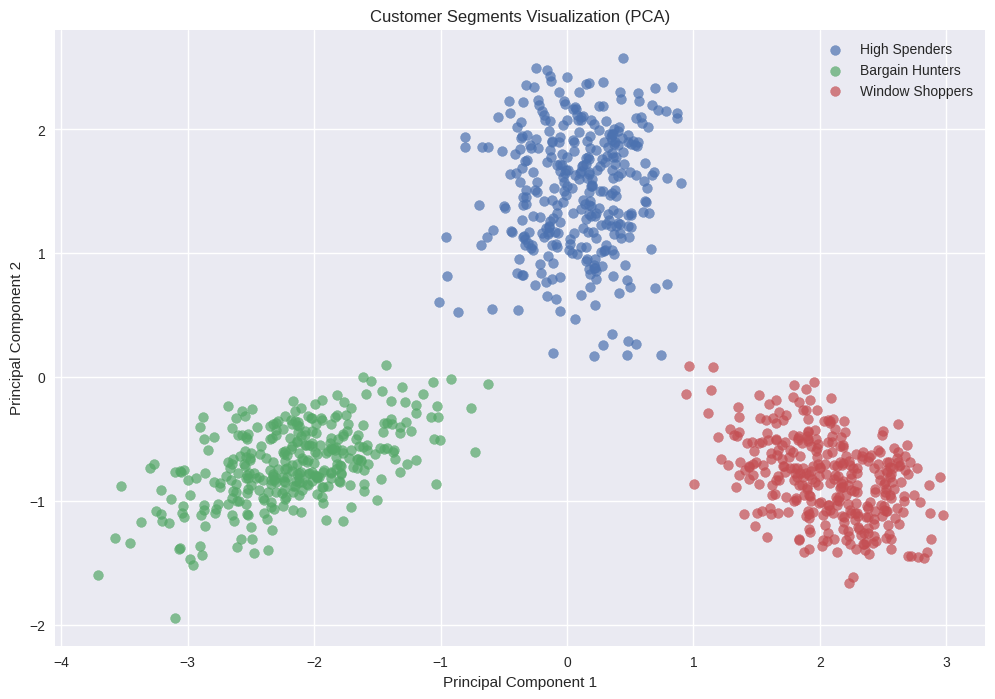

In [ ]:
# Visualize segments in PCA space
plt.figure(figsize=(12, 8))
for segment in df_clean['segment'].unique():
    segment_data = df_clean[df_clean['segment'] == segment]
    plt.scatter(segment_data['PC1'], segment_data['PC2'],
                label=segment, s=50, alpha=0.7)

plt.title('Customer Segments Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate and display segment statistics
segment_stats = df_clean.groupby('segment')[features].mean()
print("Segment Statistics (Average Values):")
print(segment_stats)

Segment Statistics (Average Values):
                 total_purchases  avg_cart_value  total_time_spent  \
segment                                                              
Bargain Hunters         1.151415       -0.810856         -0.975631   
High Spenders          -0.193988        1.281484         -0.272717   
Window Shoppers        -0.952791       -0.480790          1.247052   

                 product_click  discount_counts  
segment                                          
Bargain Hunters      -0.807503         1.256661  
High Spenders        -0.506065        -0.522886  
Window Shoppers       1.314184        -0.726840  


<Figure size 1400x800 with 0 Axes>

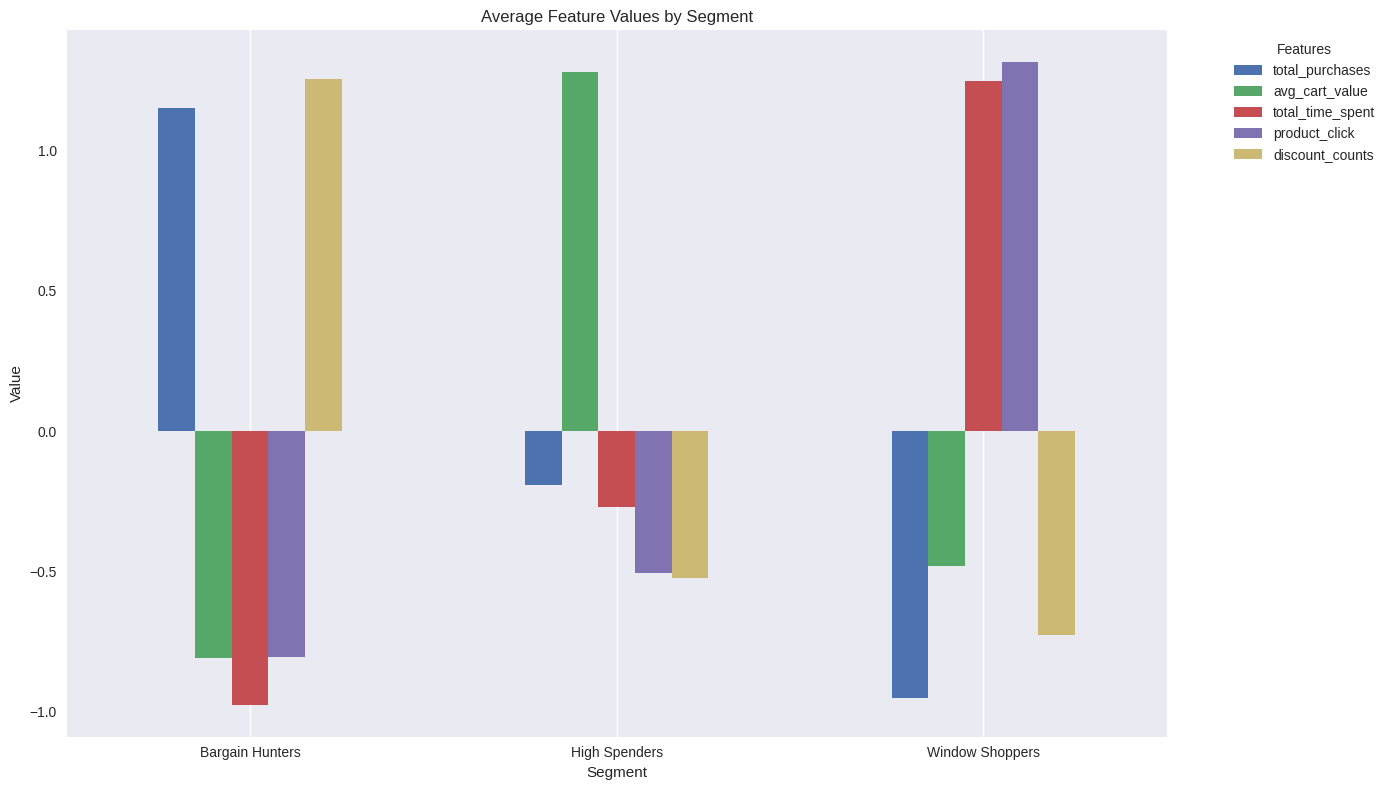

In [ ]:
# Create a visualization of segment profiles
plt.figure(figsize=(14, 8))
segment_stats.plot(kind='bar', figsize=(14, 8))
plt.title('Average Feature Values by Segment')
plt.ylabel('Value')
plt.xlabel('Segment')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

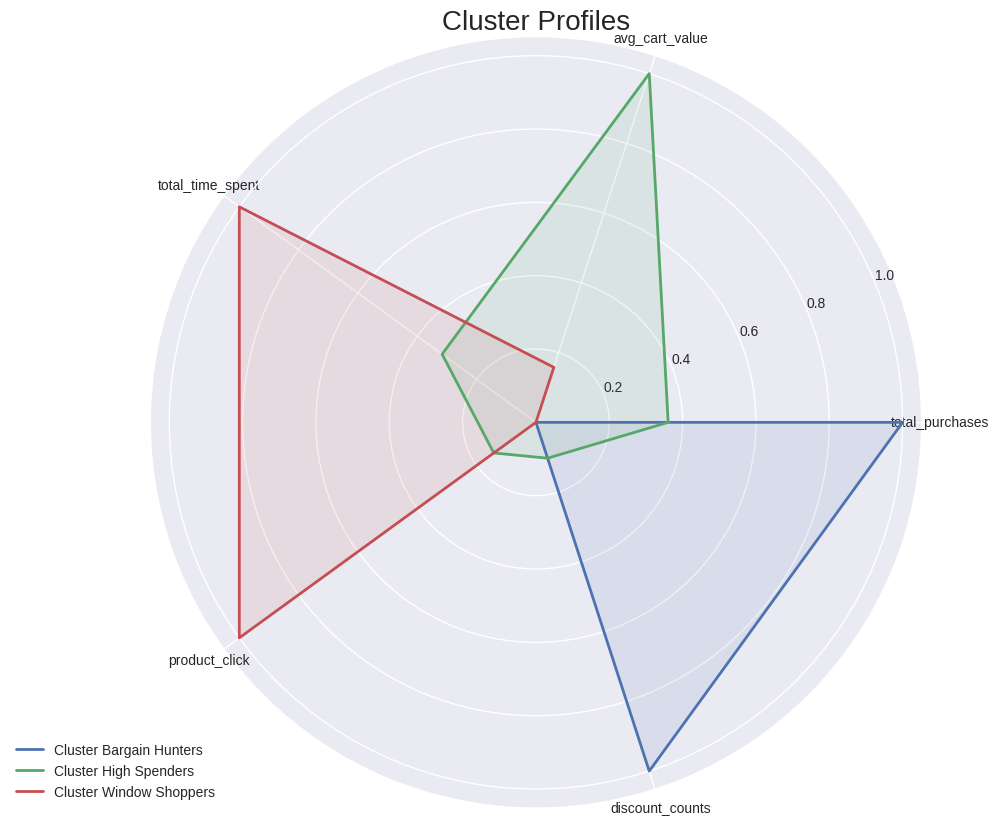

In [ ]:
# Create radar chart for segments
from sklearn.preprocessing import MinMaxScaler
radar_scaler = MinMaxScaler()
segment_stats_scaled = pd.DataFrame(
    radar_scaler.fit_transform(segment_stats),
    index=segment_stats.index,
    columns=segment_stats.columns
)

radar_chart(segment_stats_scaled, features)

# Business Insights

In [ ]:
for segment in segment_stats.index:
    print(f"\n--- {segment} ---")

    # Get characteristics for this segment
    characteristics = segment_stats.loc[segment]

    # Prepare insights based on segment
    if segment == 'Bargain Hunters':
        print("Profile: Customers who make frequent purchases of low-value items and heavily rely on discounts.")
        print("Key Characteristics:")
        print(f"- Average purchases: {characteristics['total_purchases']:.2f}")
        print(f"- Average cart value: ${characteristics['avg_cart_value']:.2f}")
        print(f"- Discount usage: {characteristics['discount_counts']:.2f} times")

    elif segment == 'High Spenders':
        print("Profile: Premium customers who focus on high-value purchases and are less influenced by discounts.")
        print("Key Characteristics:")
        print(f"- Average purchases: {characteristics['total_purchases']:.2f}")
        print(f"- Average cart value: ${characteristics['avg_cart_value']:.2f}")
        print(f"- Discount usage: {characteristics['discount_counts']:.2f} times")


    elif segment == 'Window Shoppers':
        print("Profile: Browsers who spend a lot of time on the platform but make few purchases.")
        print("Key Characteristics:")
        print(f"- Average purchases: {characteristics['total_purchases']:.2f}")
        print(f"- Time spent browsing: {characteristics['total_time_spent']:.2f} minutes")
        print(f"- Product clicks: {characteristics['product_click']:.2f}")


--- Bargain Hunters ---
Profile: Customers who make frequent purchases of low-value items and heavily rely on discounts.
Key Characteristics:
- Average purchases: 1.15
- Average cart value: $-0.81
- Discount usage: 1.26 times

--- High Spenders ---
Profile: Premium customers who focus on high-value purchases and are less influenced by discounts.
Key Characteristics:
- Average purchases: -0.19
- Average cart value: $1.28
- Discount usage: -0.52 times

--- Window Shoppers ---
Profile: Browsers who spend a lot of time on the platform but make few purchases.
Key Characteristics:
- Average purchases: -0.95
- Time spent browsing: 1.25 minutes
- Product clicks: 1.31


# Alternative Clustering Method

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

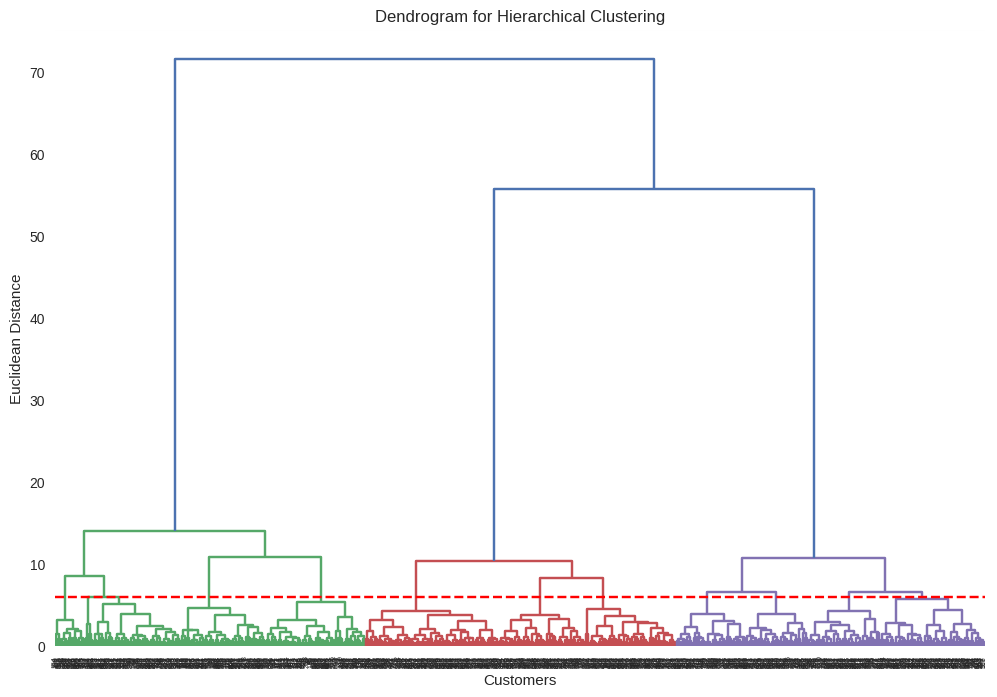

In [ ]:
# Create a dendrogram to visualize the hierarchical structure
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

In [ ]:
from sklearn.metrics import adjusted_rand_score

In [ ]:
ari = adjusted_rand_score(cluster_labels, hierarchical_labels)
print(f"Adjusted Rand Index between K-means and Hierarchical Clustering: {ari:.3f}")

Adjusted Rand Index between K-means and Hierarchical Clustering: 0.991


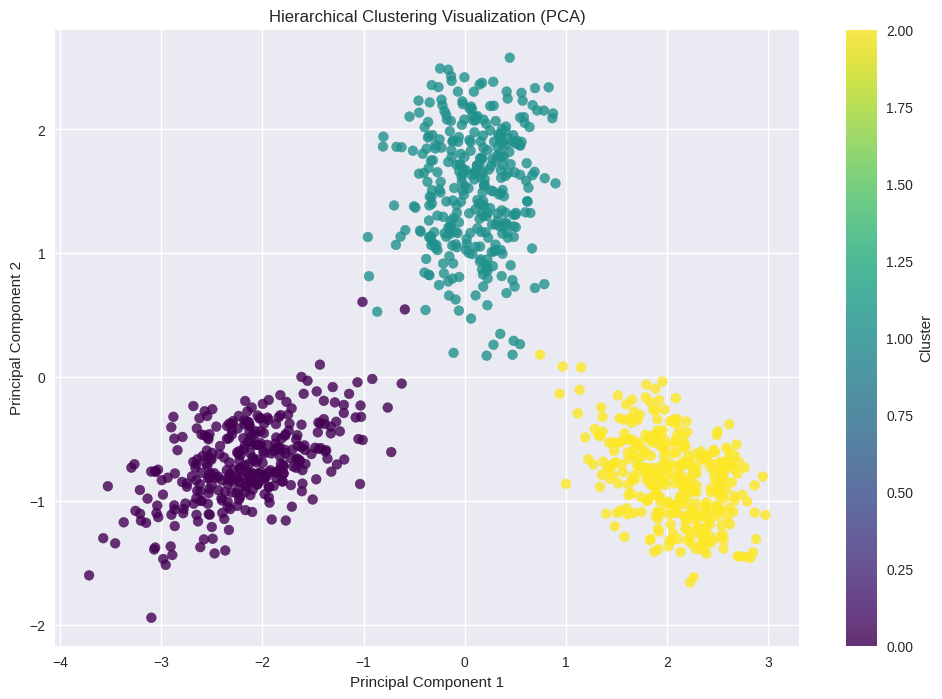

In [ ]:
# Visualize hierarchical clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', s=50, alpha=0.8)
plt.title('Hierarchical Clustering Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Saving Results

In [ ]:
if 'customer_id' in df.columns:
    result_df = pd.DataFrame(index=features_df_clean.index)
    result_df['customer_id'] = df.loc[features_df_clean.index, 'customer_id']

    for feature in features:
        result_df[feature] = features_df_clean[feature]

    result_df['cluster'] = cluster_labels
    result_df['segment'] = result_df['cluster'].map(cluster_mapping)
else:
    result_df = df_clean.copy()


In [ ]:
result_df.to_csv('customer_segments_results.csv', index=False)